# **Final Project 4 : Clustering**

Proyek ini dibuat untuk meemnuhi tugas dari Course Python for Data Science 

### **Anggota** ###

- Muhammad Reza Pahlevi
- Caesariansyah Dwi Fadhilah

## **A. Introduction** 

Dalam ranah pemasaran strategis, kasus ini memerlukan pengembangan strategi segmentasi pelanggan yang komprehensif. Upaya ini berkisar pada kumpulan data sampel yang merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama enam bulan terakhir. Dataset yang disusun pada tingkat nasabah ini terdiri dari 18 variabel perilaku, yang masing-masing menjelaskan berbagai aspek dari interaksi keuangan pemegang kartu kredit. Mosaik data ini menyediakan lahan subur untuk perumusan pendekatan pemasaran yang ditargetkan, yang bertujuan untuk meningkatkan kepuasan nasabah dan mengoptimalkan upaya promosi. Dengan 8950 contoh yang merinci seluk-beluk profil kartu kredit nasabah, tugas yang harus dilakukan adalah menyaring wawasan yang dapat ditindaklanjuti untuk memandu strategi pemasaran yang efektif.

Untuk memfasilitasi penyelidikan ini, dataset yang bersumber dari Kaggle digunakan, yang berisi informasi yang diekstrak dari dataset kartu kredit untuk pengelompokan. Dataset ini terdiri dari 8950 baris dan 18 kolom.

## **B. Import Libraries**

Libraries diperlukan untuk mengelompokkan cluster-cluster dengan memiliki kemiripan yang sama.

In [26]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import gaussian_kde,f_oneway
from scipy.integrate import simps

import warnings
warnings.filterwarnings("ignore")

## **C. Data Loading**

Impor *CC GENERAL.csv* sebagai df.

In [37]:
df = pd.read_csv("CC GENERAL.csv")
pd.set_option('display.max_columns', 50)
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Ringkasan informasi tentang DataFrame.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [39]:
for col in df.columns:
    print(col, ":", df[col].nunique())

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 205
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8636
PRC_FULL_PAYMENT : 47
TENURE : 7


### **Cek Duplikat Data**

In [40]:
df.duplicated().sum()

0

Dari kode di atas, dapat kita simpulkan bahwa tidak ada data yang terduplikasi.

### **Cek Null Values**

In [41]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari kode di atas, dapat disimpulkan bahwa pada variable MINIMUM_PAYMENTS memiliki 313 null value dan CREDIT_LIMIT memiliki null value sebanyak 1

In [42]:
dfnull = df.columns[df.isnull().any()].tolist()
imputer = KNNImputer()
dfImputer = pd.DataFrame(imputer.fit_transform(df[dfnull]), columns=dfnull)
df=df.fillna(dfImputer)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah diisi dengan KNNImputer, null value menjadi 0.

<span style="color:blue">KNNImputer adalah metode imputasi yang menggunakan KNN untuk mengisi null values, bekerja dengan mencari **k-Nearest Neighbors** dari setiap sampel yang memiliki nilai yang hilang, dan kemudian menghitung nilai imputasi berdasarkan value nearest neighbors</span>

Menghilangkan kolom CUST_ID karena tidak dibutuhkan pada clustering.

In [43]:
df = df.drop('CUST_ID', axis=1)

In [11]:
for feature in df.columns:
    fig = px.box(df, y=feature, title=f'Boxplot of {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

<span style="color:RED">**Outliers merupakan nilai-nilai yang jauh berbeda dari sebagian besar data dalam suatu himpunan. Nilai ini bisa memiliki perbandingan yang jauh diatas ataupun dibawah dari nilai lainnya.**</span>

<span style="color:RED">Apabila ingin menghilangkan outliers maka harus mempertimbangkan beberapa hal, contohnya apakah outliers tersebut merupakan suatu anomali atau error dari sebuah data. selain itu juga menentukan apakah outliers akan berpengaruh pada model yang akan digunakan, hal ini dikarenakan beberpa model seperti k-means yang sensitif terhadap outliers.</span>

Pada visualisasi diatas dapat dilihat bahwa data memiliki sangat banyak outliers. Dimana outliers tersebut bukanlah error ataupun anomali, melainkan persebaran data dikarenakan data merupakan kebiasaan dari 9000 user pemegang kartu kredit. Perbedaan value data dapat dipengaruhi oleh beberapa faktor eksternal seperti jumlah pendapatan, gaya hidup ataupun berbagai hal lainnya. Maka dari itu untuk sementara maka outliers tidak akan di hilangkan. 

## **D. Exploratory Data Analysis**

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Dari hasil statistik diatas dapat disimpulkan bahwa :
1. Data rata rata positif skewed.
1. Balance atau saldo yang tersisa dari 8950 user memiliki rata-rata `1564.47`, dan dengan Q2 menunjukkan nilai `873.385231`, dapat disimpulkan bahwa setengah dari pengguna memiliki saldo kurang dari nilai Q2.
2. Pada BALANCE_FREQUENCY menunjukkan bahwa sebagian besar pengguna adalah pengguna aktif yang sering menggunakan kartu kredit dan hanya sebagian kecil yang jarang menggunakan kartu kredit dilihat dari proporsi Q2 yang langsung menunjukkan value `1`.
3. Beberapa pengguna sama sekali tidak melakukan pembelian dengan kartu kredit karena value minimum adalah `0`. Dengan persebaran data pada Q1, Q2 dan Q3 menunjukkan bahwa dari 8950 pengguna, melakukan pembelian dengan nilai yang beragam.
4. Pada ONEOFF_PURCHASES menunjukkan bahwa rata-ratanya adalah `592.44` dan dengan value mulai pada Q3 dan seterusnya memiliki nilai yang lebih tinggi dari INSTALLMENTS_PURCHASES, dapat disimpulkan secara kasar bahwa beberapa pengguna ketika membeli sesuatu dengan harga yang tinggi lebih menyukai menggunakan ONEOFF_PURCHASES daripada mencicil.
5. Rata-rata TENURE adalah `11.517318` yang menunjukkan bahwa hampir semua memiliki TENURE `12` bulan.

##### **Correlation**

In [47]:
fig = px.imshow(df.corr(),title="Correlation Every Feature in Dataset")
fig.update_layout(width=900, height=700)
fig.show()

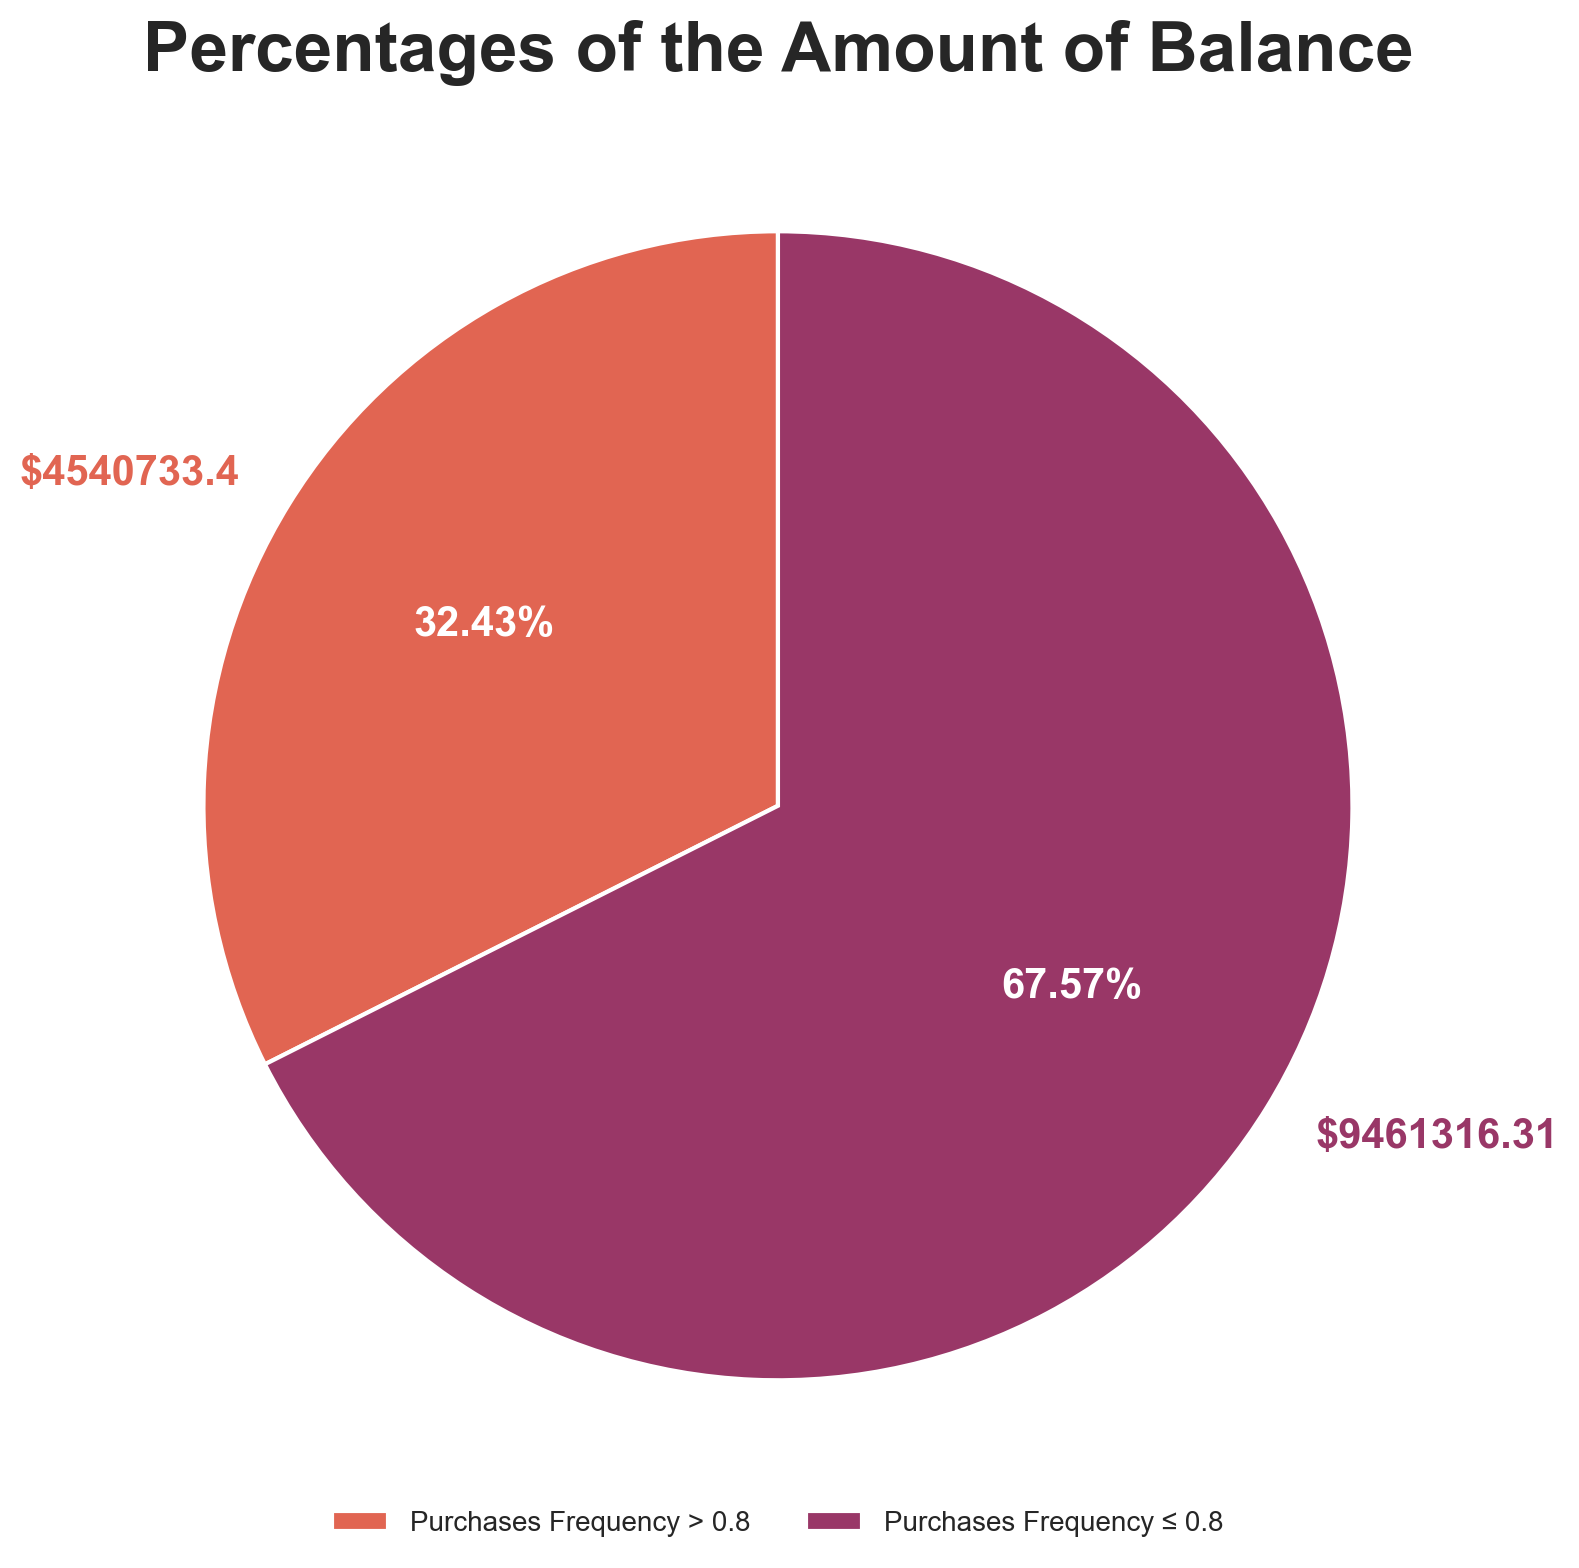

In [48]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
patches,texts,pcts = ax.pie(
    [df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum()],
    labels=[f'${round(df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),2)}',f'${round(df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum(),2)}'],
    startangle=90, colors=["#e16552","#993767"], autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax.set_title("Percentages of the Amount of Balance",size=25,fontweight="bold")
ax.legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())

plt.setp(pcts,color="white",fontweight="bold",size=15)
plt.setp(texts,fontweight="bold",size=15)
plt.tight_layout()
plt.show()

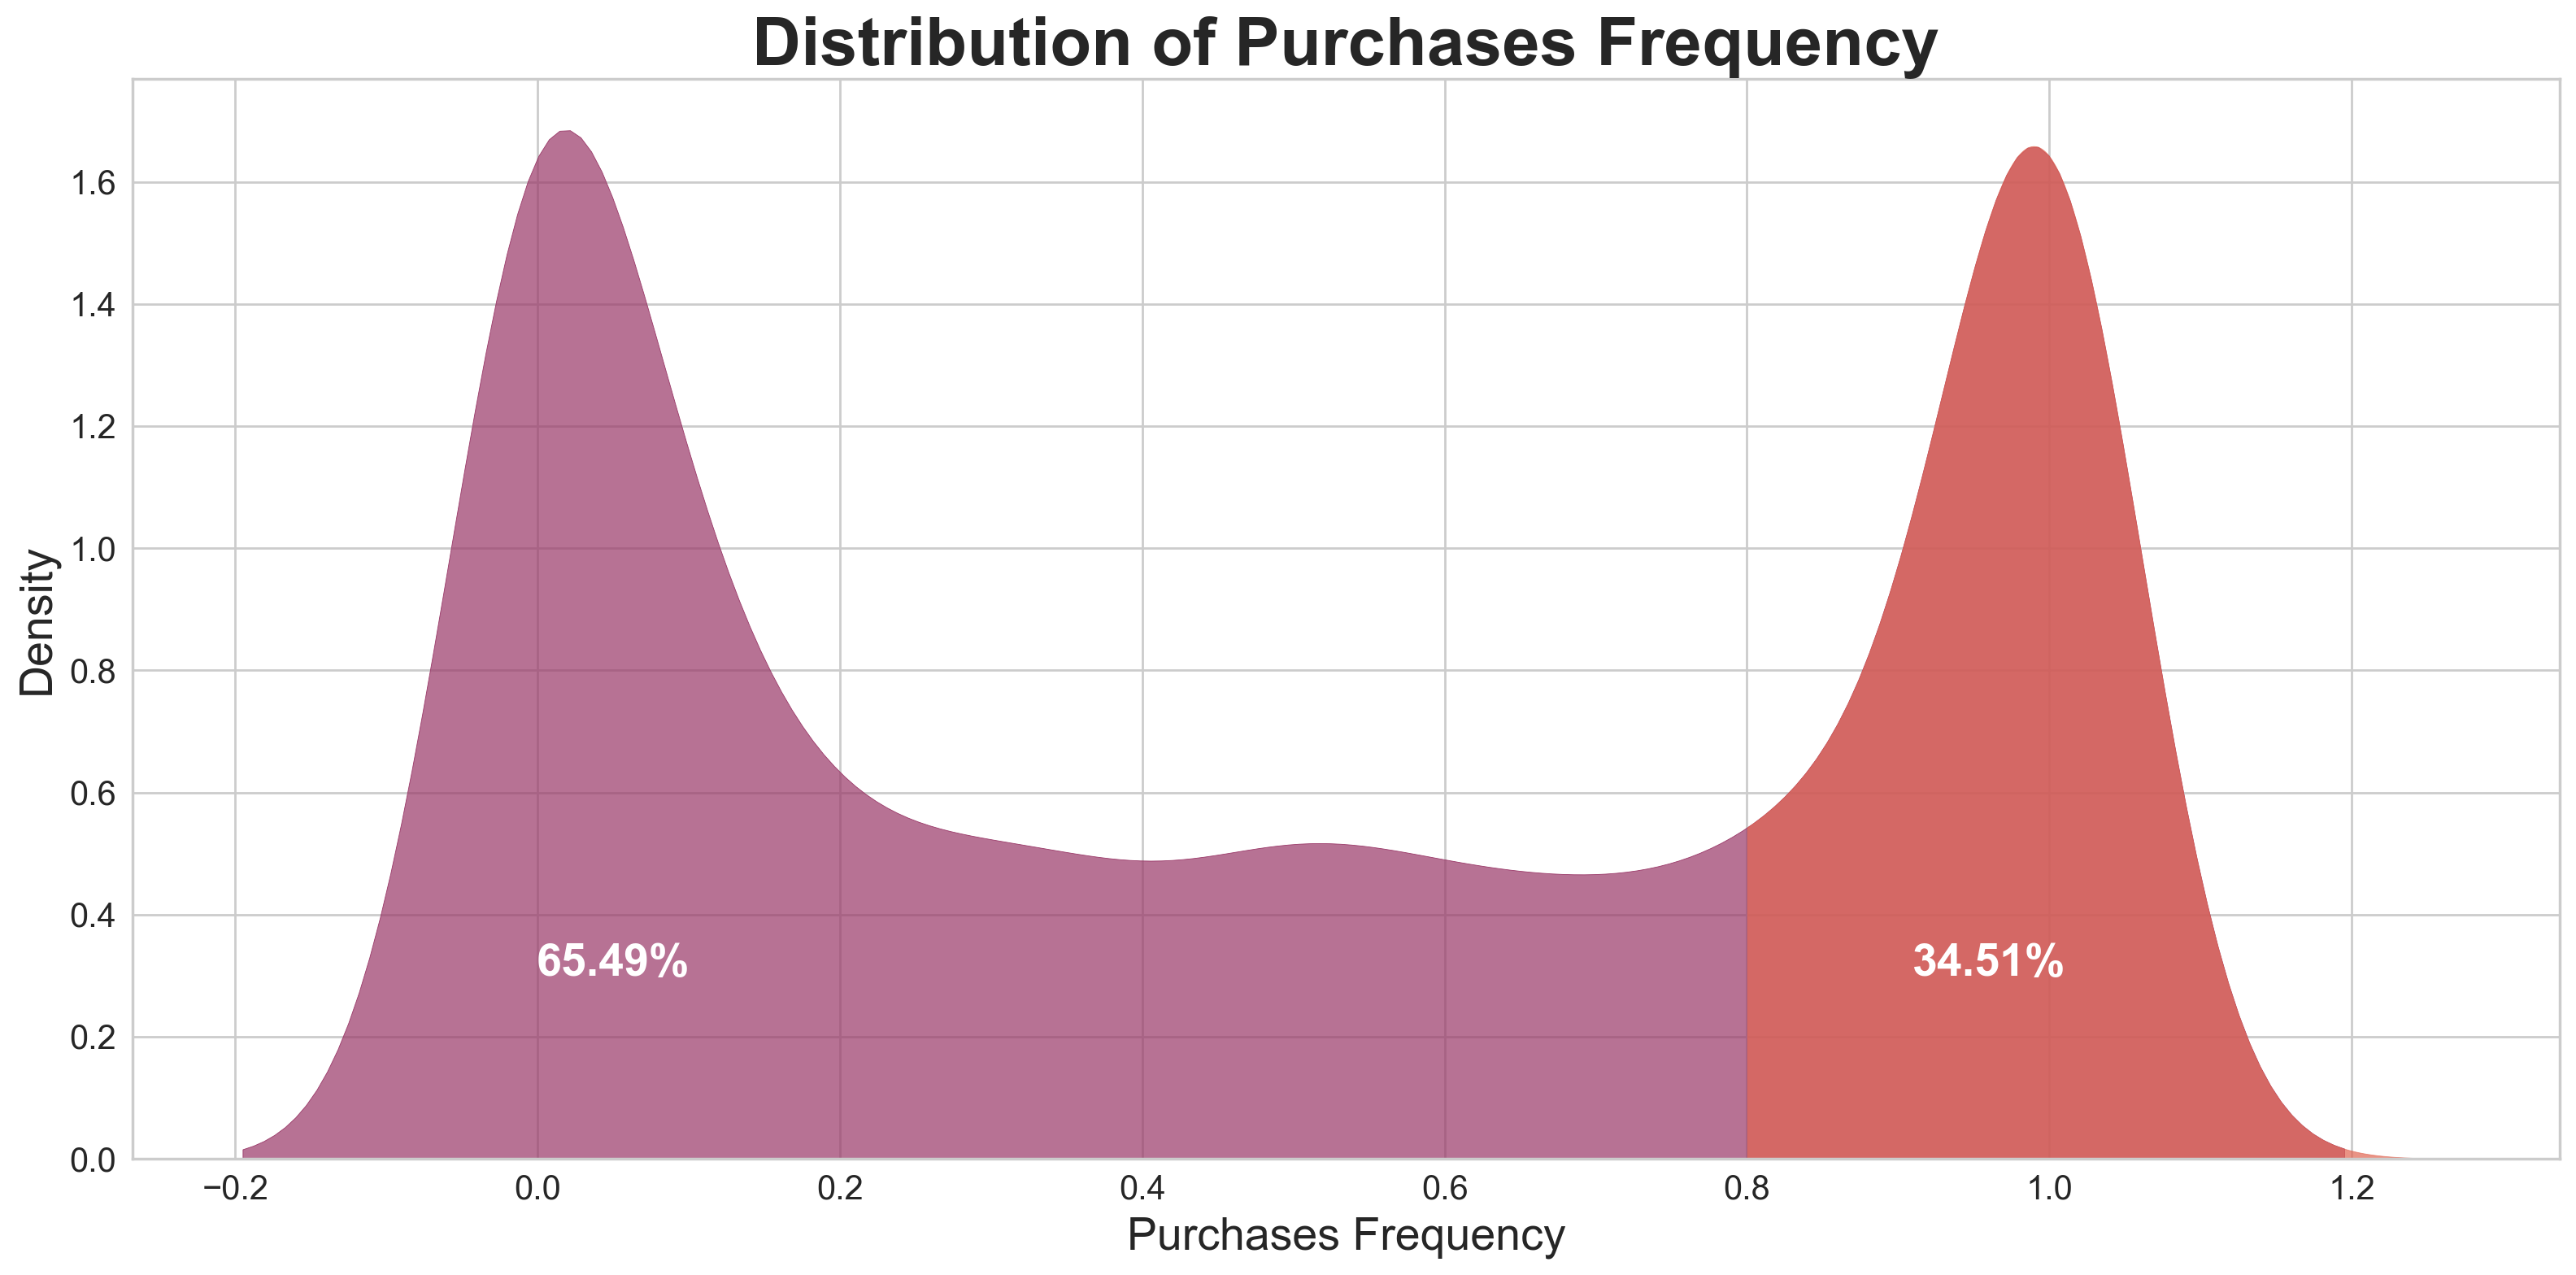

In [49]:
fig,ax = plt.subplots(figsize=(16,8),dpi=200)

kde_plot = sns.kdeplot(ax=ax,data=df,x="PURCHASES_FREQUENCY",color="#993767",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["PURCHASES_FREQUENCY"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#e16552",alpha=0.7)

ax.text(x=0.96, y=0.3, horizontalalignment="center",
        s=f"{round(len(df[df['PURCHASES_FREQUENCY'] > 0.8])/len(df)*100,2)}%",
        color="white", fontweight="bold", fontsize=20)
ax.text(x=0.05, y=0.3, horizontalalignment="center",
        s=f"{round(len(df[df['PURCHASES_FREQUENCY'] <= 0.8])/len(df)*100,2)}%",
        color="white", fontweight="bold", fontsize=20)

ax.set_title("Distribution of Purchases Frequency",size=30,fontweight="bold")
ax.set_xlabel("Purchases Frequency",size=20,labelpad=5)
ax.set_ylabel("Density",size=20,labelpad=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

Dari dua visualisasi di atas, dapat disimpulkan bahwa total saldo pelanggan yang paling sering berbelanja (mari kita tetapkan ambang batas pada 0,8) mencapai 32,43% dari total saldo semua pelanggan.

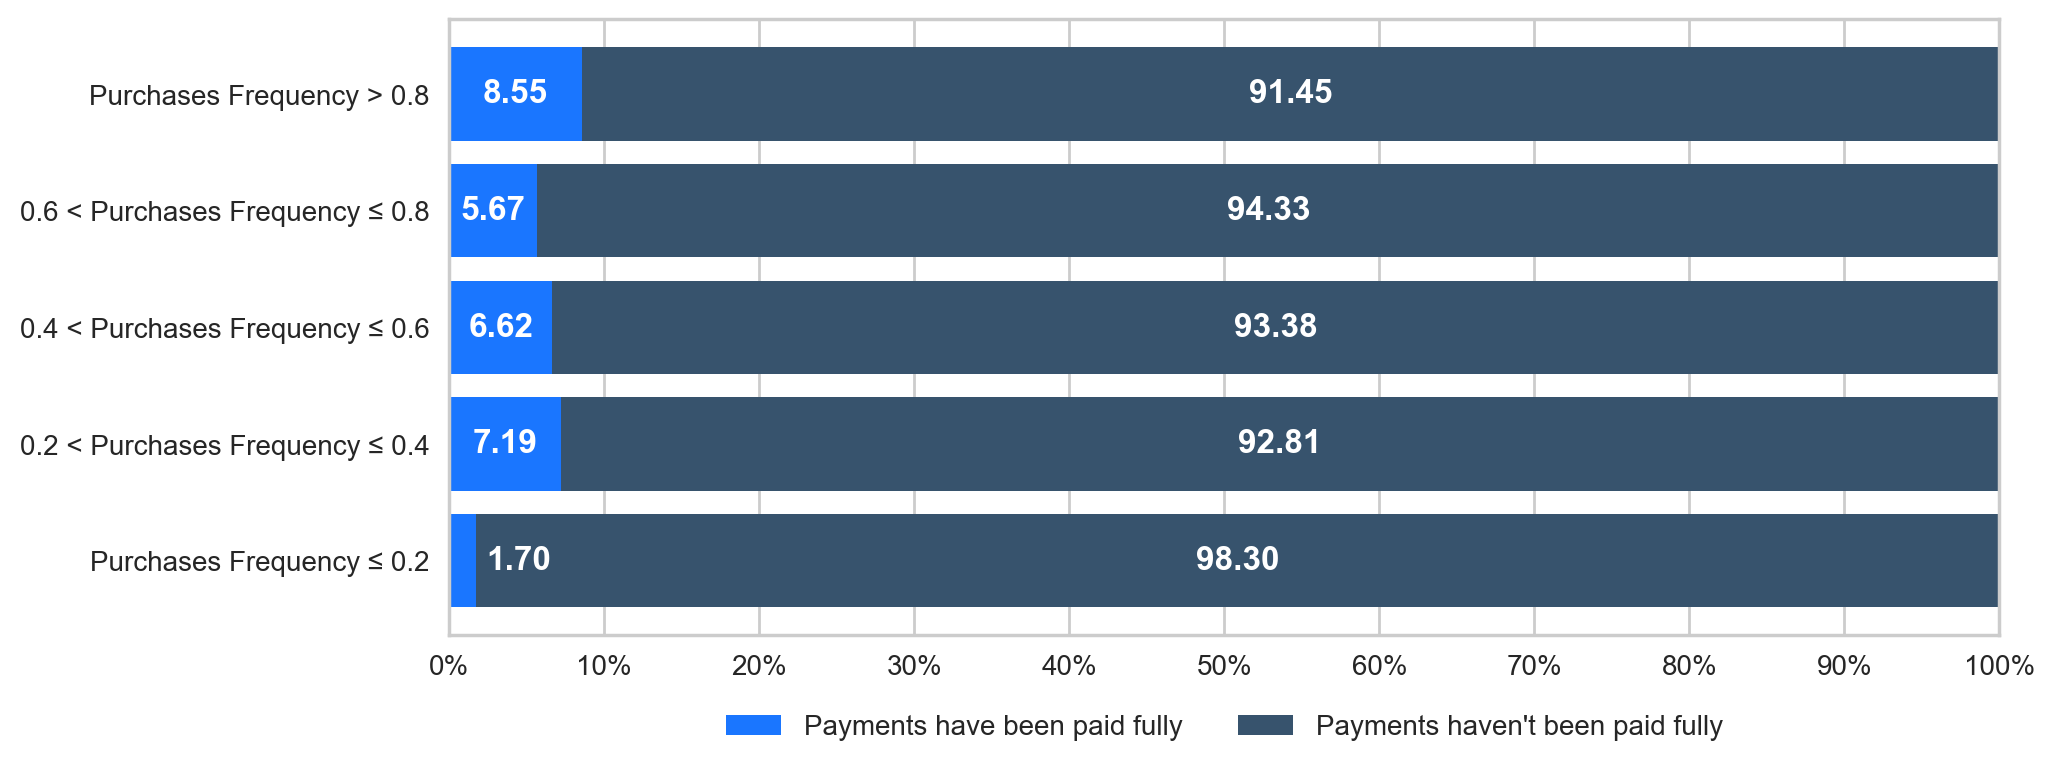

In [65]:
first = df[df["PURCHASES_FREQUENCY"] <= 0.2]
second = df[(df["PURCHASES_FREQUENCY"] > 0.2) & (df["PURCHASES_FREQUENCY"] <= 0.4)]
third = df[(df["PURCHASES_FREQUENCY"] > 0.4) & (df["PURCHASES_FREQUENCY"] <= 0.6)]
fourth = df[(df["PURCHASES_FREQUENCY"] > 0.6) & (df["PURCHASES_FREQUENCY"] <= 0.8)]
fifth = df[df["PURCHASES_FREQUENCY"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1,prc_full_payment_not_1 = [],[]
for subset in [first,second,third,fourth,fifth]:
    prc_full_payment_is_1.append(len(subset[subset["PRC_FULL_PAYMENT"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["PRC_FULL_PAYMENT"] != 1]) / len(subset) * 100)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)
n = 0

for label,prc_is_1,prc_not_1 in zip(labels,prc_full_payment_is_1,prc_full_payment_not_1):
    if n == 0:
        ax.barh(label,prc_is_1,color="#1a76ff",label="Payments have been paid fully")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d",label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label,prc_is_1,color="#1a76ff")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d")
for container in ax.containers[:1]:
    ax.bar_label(container,fmt="%.2f",padding=4,color="white",fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0,101,10),[f"{xtick}%" for xtick in np.arange(0,101,10)])
ax.legend(ncol=2,bbox_to_anchor=(0.5,-0.15),loc="center")

plt.show()

Dari barplot di atas, dapat kita lihat bahwa tidak peduli seberapa sering pelanggan melakukan pembelian, hanya ada kurang dari 10% yang telah membayar lunas di setiap kelompok.

In [50]:
pur_Temean = df.groupby('TENURE')['PURCHASES'].mean().reset_index()
purTx_Temean = df.groupby('TENURE')['PURCHASES_TRX'].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=pur_Temean['TENURE'], y=pur_Temean['PURCHASES'], name='PURCHASES', marker_color='rgb(139,240,222)'))
fig.add_trace(go.Bar(x=purTx_Temean['TENURE'], y=purTx_Temean['PURCHASES_TRX'], name='PURCHASES_TRX', marker_color='rgb(158,191,255)'))
fig.update_layout(
    title='PURCHASES and PURCHASES_TRX VS TENURE (mean)',
    xaxis=dict(tickfont_size=12,
               title='TENURE'),
    yaxis=dict(
        title='PURCHASES and PURCHASES_TRX',
        titlefont_size=14,
        tickfont_size=12,
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.0 
)
fig.show()

Dapat disimpulkan bahwa user memiliki kecenderungan untuk mengambil tenur 12 bulan apabila harga suatu barang cukup tinggi juga dengan jumlah yang banyak. Sedangkan dengan harga suatu barang yang rendah cenderung memilih untuk memiliki tenur yang rendah.

In [51]:
fig = px.scatter(df, x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES',
                 title='ONE OFF PURCHASES vs INSTALLMENTS PURCHASES',
                 labels={'ONEOFF_PURCHASES': 'ONEOFFPURCHASES', 'INSTALLMENTS_PURCHASES': 'INSTALLMENTSPURCHASES'},
                 color_discrete_sequence=['red'])

fig.update_traces(marker=dict(color='yellow', line=dict(color='red', width=1)))
fig.update_layout(height=500, width=700)
fig.show()


Dari Scatter plots diatas dapat disimpulkan bahwa kebqanyakan user lebih memilih INSTALLMENTS_PURCHASES daripada ONEOFF_PURCHASES

## **E. Preprocessing Data**

### **Data Scaling**

In [52]:
scaler = StandardScaler() 
scaledHPK = pd.DataFrame(scaler.fit_transform(df)) #scaler untuk hopkins statistic
scaled = scaler.fit_transform(df) #scaler untuk yang normal

**Kenapa dibedakan?**<br>
Karena memudahkan daripada harus mengubah data menjadi array lagi setelah hopkins statistic

Hopkins Statistic atau Hopkins Test adalah suatu metode statistik yang digunakan untuk mengukur kecenderungan suatu dataset untuk bersifat clustering. Saya memutuskan untuk menggunakan Hopkins Statistic karena ingin tau adakah cara untuk menentukan apakah data memiliki hubungan aku kecenderungan unuk di kelompokan, yang artinya bisa di lakukan clustering atau tidak.

**References** dimana saya menemukan Hopkins Statistic :<br>
[Web yang membahas kecenderungan data untung mengkelompok](https://www.datanovia.com/en/lessons/assessing-clustering-tendency/)<br>
[Wikipedia Hopkins statistic](https://en.wikipedia.org/wiki/Hopkins_statistic)<br>
[Sumber kode Hopkins Statistic](https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python)


In [53]:
#Fungsi Hopkins Statistic
def hpk(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]

    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X)

    from random import sample
    rand_X = sample(range(0, n, 1), m) #buat sampel acak dari m, antara 0 sampe n-1

    from numpy.random import uniform
    ujd = []
    wjd = []
    for j in range(0, m): #range 0-m
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True) #kode asli pake distribusi normal, diganti ke uniform biar ga tergantung mean, apalagi datanya skew parah
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True) #pakai iloc biar kalo ada float ga kacau
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    return H

### **Fungsi untuk Hopkins Statictic**

In [54]:
hpktest = hpk(scaledHPK)
print( ">>", hpktest)

>> 0.9673407026385209


Dari hasil Hopkins Statistic menujukan angka `0.9673407026385209` yang berari data memiliki kecenderungan untk dikelompokan hal ini didasarkan dari didapatkan kode awal yang mengatakan bahwa :

**`If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.`**

Jadi data tersebut memiliki kecenderungan yang kuat untuk berkelompok atau dikelompokan

### **Hierarchical Clustering**

In [55]:
linkage_matrix = linkage(scaled, method='ward', metric='euclidean')

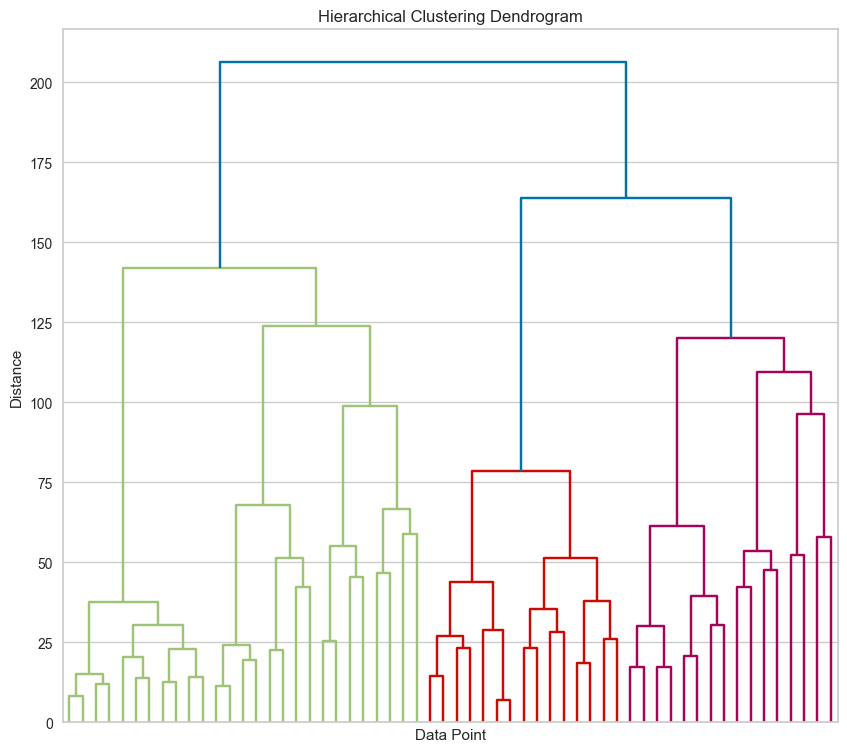

In [56]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(linkage_matrix, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Dari Grafik Hierarchical Clustering di atas, dapat dilihat bahwa terdapat 3 branch utama apabila diambil garis dari distace 150

### **Principal Component Analysis**

In [57]:
pca =PCA(n_components=2, random_state=42)
scaled = pca.fit_transform(scaled)

## **F. Model Defining**

### **K-Means**

> **K-Means**

#### **Elbow Method**

In [58]:
km_model = [KMeans(n_clusters=km, random_state=42).fit(scaled) for km in range(1,11)]
wcss = [mod.inertia_ for mod in km_model ]

figelkm = px.line(x=range(1, 11), 
              y=wcss, markers=True, 
              title='Elbow Method')
figelkm.update_layout(xaxis_title='Number of Clusters', 
                  yaxis_title='km_iner')
figelkm.show()

Dari test elbow score dapat disimpulkan bahwa 2,3 dan 4 memiliki nilai yang paling baik.

#### **Silhouette Score**

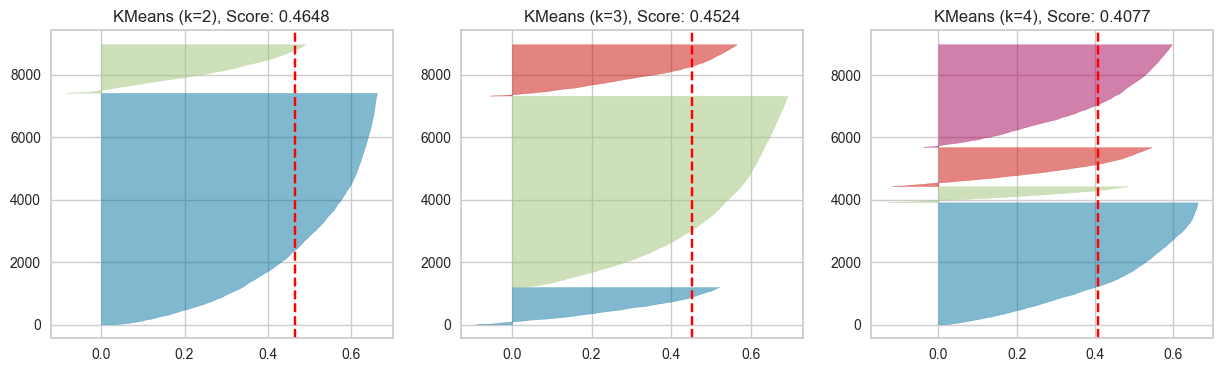

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

km_shsc = [silhouette_score(scaled, mod.labels_)for mod in km_model[1:4]]
for i, mod in enumerate(km_model[1:4], 1):
    visualizer = SilhouetteVisualizer(mod, colors='yellowbrick', ax=ax[i-1])
    visualizer.fit(scaled)
    
    shkm_score = silhouette_score(scaled, mod.labels_)

    ax[i-1].set_title(f'KMeans (k={i+1}), Score: {shkm_score:.4f}')

plt.show()


- Semua cluster berada diatas rata-rata menandakan semua cluster well-defined dan terbagi dengan baik.
- dengan pertimbangan persebaran semu cluster yang memiliki score diatas rata-rata maka akan diambil `K=4`
- penggambilan`K=4` ini karena perbedaan score yang tidak terlalu jauh juga jumlah cluster yang lebih banyak.

**Refrensi silhouette scores dan Elbow Method** :(https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/)

In [60]:
kmDef4 = KMeans(n_clusters=4, random_state=42)

> **DBSCAN**

> **Hierarchical Clustering**

### **DBSCAN**

## **G. Model Training**

> **K-Means**

In [61]:
y_km = kmDef4.fit(scaled)

In [62]:
kmCLlabel = y_km.labels_

In [63]:
df['Cluster_KM'] = kmCLlabel

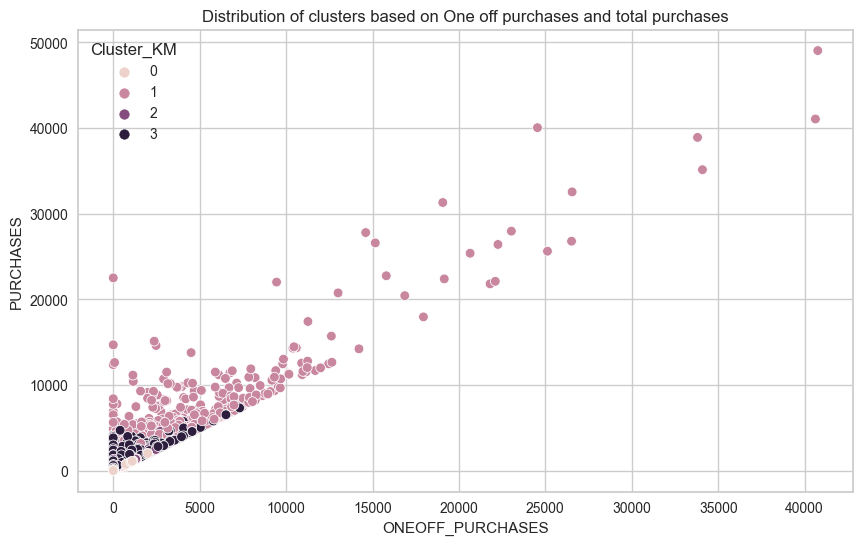

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='Cluster_KM')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

## **H. Model Evaluation**

> **K-Means**

## **I. Model Inference**

## **J. Conclusion**